<a href="https://colab.research.google.com/github/Patelroneek/mysterio/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting Housing Prices with Linear Regression using Python, pandas, and statsmodels

Linear regression is a model that predicts a relationship of direct proportionality between the dependent variable (plotted on the vertical or Y axis) and the predictor variables (plotted on the X axis) that produces a straight line, like so:

**Reading in the Data with pandas**


In [ ]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import pandas as pd
import numpy as np

## **You can grab the data using the pandas read_csv method directly from GitHub. Alternatively, you can download it locally.**

In [ ]:
root = 'https://raw.githubusercontent.com/LearnDataSci/article-resources/master/Housing%20Price%20Index%20Regression'

housing_price_index = pd.read_csv(root + '/monthly-hpi.csv')
unemployment = pd.read_csv(root + '/unemployment-macro.csv')
federal_funds_rate = pd.read_csv(root + '/fed_funds.csv')
shiller = pd.read_csv(root + '/shiller.csv')
gross_domestic_product = pd.read_csv(root + '/gdp.csv')

## **Once we have the data, invoke pandas' merge method to join the data together in a single dataframe for analysis. Some data is reported monthly, others are reported quarterly. No worries. We merge the dataframes on a certain column so each row is in its logical place for measurement purposes. In this example, the best column to merge on is the date column. See below.**

In [ ]:
# merge dataframes into single dataframe by date
df = (shiller.merge(housing_price_index, on='date')
                    .merge(unemployment, on='date')
                    .merge(federal_funds_rate, on='date')
                    .merge(gross_domestic_product, on='date'))

## Let's get a quick look at our variables with pandas' head method. The headers in bold text represent the date and the variables we'll test for our model. Each row represents a different time period.

In [ ]:
df.head()

,date,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,2011-01-01,1282.62,220.22,3.39,181.35,16.2,8393,2800,6816,6.5,60.1,0.17,5766.7,64.2,192.7,14881.3
1,2011-04-01,1331.51,224.91,3.46,180.80,16.1,8016,2466,6823,6.8,59.4,0.10,5870.8,64.2,203.1,14989.6
2,2011-07-01,1325.19,225.92,3.00,184.25,15.9,8177,2785,6850,6.8,59.2,0.07,5802.6,64.0,204.6,15021.1
3,2011-10-01,1207.22,226.42,2.15,181.51,15.8,7802,2555,6917,8.0,57.9,0.07,5812.9,64.1,201.1,15190.3
4,2012-01-01,1300.58,226.66,1.97,179.13,15.2,7433,2809,7022,7.4,57.1,0.08,5765.7,63.7,200.7,15291.0


## Usually, the next step after gathering data would be exploratory analysis. Exploratory analysis is the part of the process where we analyze the variables (with plots and descriptive statistics) and figure out the best predictors of our dependent variable.
We'll use **ordinary least squares (OLS)**, a basic yet powerful way to assess our model.



## **Simple Linear Regression**

A simple linear regression equation is as follows:
Y=mX+B+E

Where:

 Y= dependent variable

 m= regression coefficient

 B= intercept (expected mean value of housing prices when our independent variable is zero)

X = predictor (or independent) variable used to predict Y

 E= the error term, which accounts for the randomness that our model can't explain.

Using statsmodels' ols function, we construct our model setting housing_price_index as a function of total_unemployed. We assume that an increase in the total number of unemployed people will have downward pressure on housing prices. Maybe we're wrong, but we have to start somewhere!
## The code below shows how to set up a simple linear regression model with total_unemploymentas our predictor variable.

In [ ]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("housing_price_index ~ total_unemployed", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()
#print(housing_model_summary)

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

# **Adj. R-squared **indicates that 95% of housing prices can be explained by our predictor variable, total_unemployed.

# The **regression coefficient (coef) **represents the change in the dependent variable resulting from a one unit change in the predictor variable, all other variables being held constant. In our model, a one unit increase in total_unemployed reduces housing_price_index by 8.33. In line with our assumptions, an increase in unemployment appears to reduce housing prices.

The **standard error** measures the accuracy of total_unemployed's coefficient by estimating the variation of the coefficient if the same test were run on a different sample of our population. Our standard error, 0.41, is low and therefore appears accurate.

The **p-value** means the probability of an 8.33 decrease in housing_price_index due to a one unit increase in total_unemployed is 0%, assuming there is no relationship between the two variables. A low p-value indicates that the results are statistically significant, that is in general the p-value is less than 0.05.

The **confidence interval** is a range within which our coefficient is likely to fall. We can be 95% confident that total_unemployed's coefficient will be within our confidence interval, [-9.185, -7.480].

## **Regression Plots**
Please see the four graphs below.

The **“Y and Fitted vs. X” graph plots** the dependent variable against our predicted values with a confidence interval. The inverse relationship in our graph indicates that housing_price_index and total_unemployed are negatively correlated, i.e., when one variable increases the other decreases.
The “**Residuals versus total_unemployed**” graph shows our model's errors versus the specified predictor variable. Each dot is an observed value; the line represents the mean of those observed values. Since there's no pattern in the distance between the dots and the mean value, the OLS assumption of homoskedasticity holds.
The **“Partial regression plot**” *shows* t **bold text**he relationship between housing_price_index and total_unemployed, taking in to account the impact of adding other independent variables on our existing total_unemployed coefficient. We'll see later how this same graph changes when we add more variables.
The **Component and Component Plus Residual** (CCPR) plot is an extension of the partial regression plot, but shows where our trend line would lie after adding the impact of adding our other independent variables on our existing total_unemployed coefficient. More on this plot here.

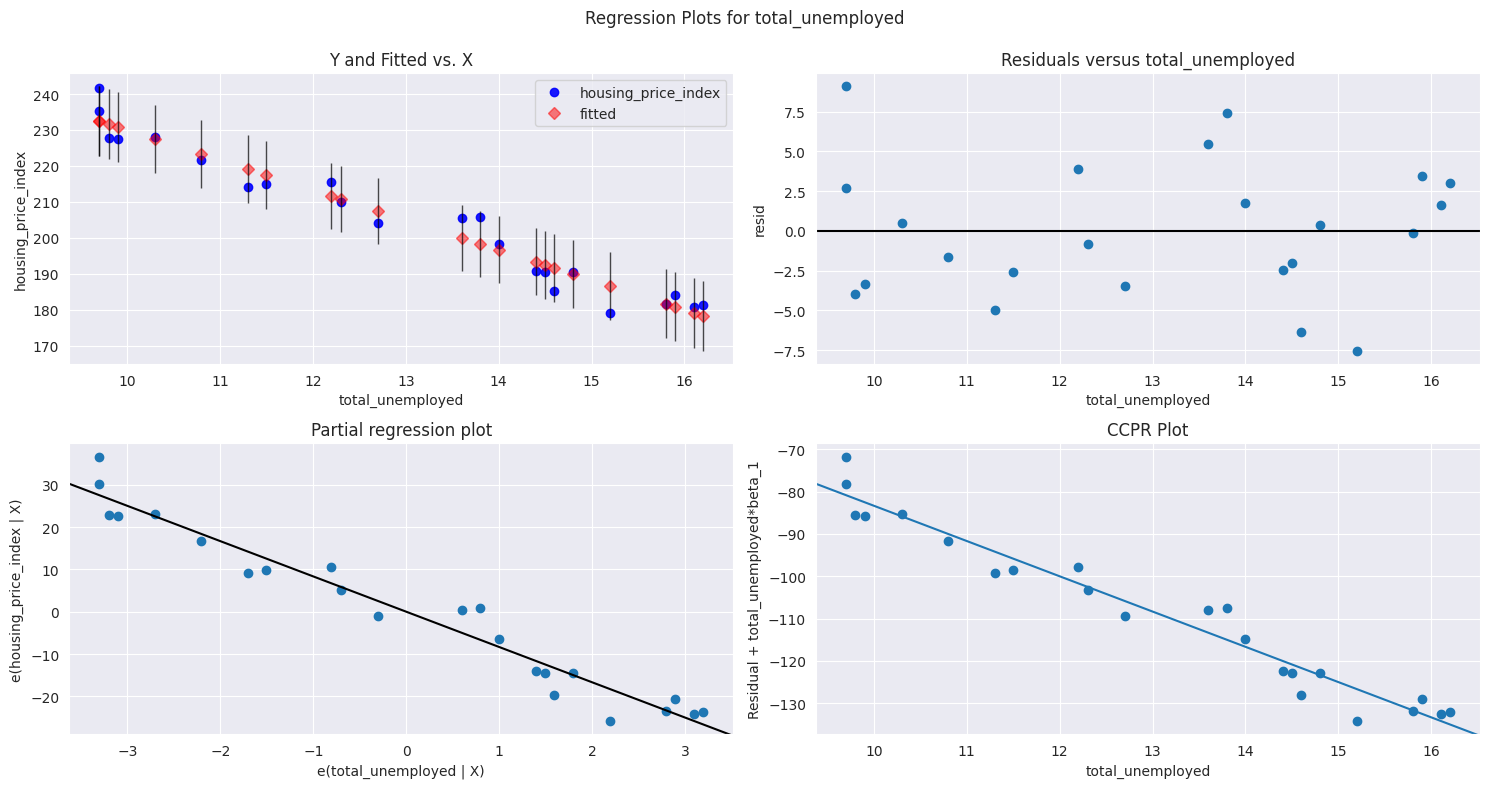

In [ ]:
# This produces our four regression plots for total_unemployed

fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(housing_model, "total_unemployed", fig=fig)

## The next plot graphs our trend line (green), the observations (dots), and our confidence interval (red).

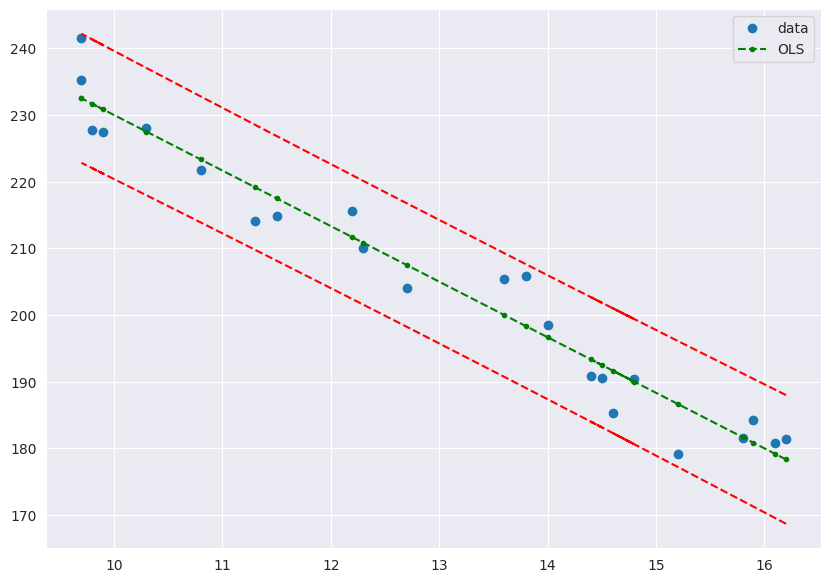

In [ ]:
# predictor variable (x) and dependent variable (y)
x = df[['total_unemployed']]
y = df[['housing_price_index']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

### **Multiple Linear Regression**
Mathematically, multiple linear regression is:

We know that unemployment cannot entirely explain housing prices. To get a clearer picture of what influences housing prices, we add and test different variables and analyze the regression results to see which combinations of predictor variables satisfy OLS assumptions, while remaining intuitively appealing from an economic perspective.

We arrive at a model that contains the following variables: fed_funds, consumer_price_index, long_interest_rate, and gross_domestic_product, in addition to our original predictor, total_unemployed.

Adding the new variables decreased the impact of total_unemployed on housing_price_index. total_unemployed‘s impact is now more unpredictable (standard error increased from 0.41 to 2.399), and, since the p-value is higher (from 0 to 0.943), less likely to influence housing prices.
Although total_unemployed may be correlated with housing_price_index, our other predictors seem to capture more of the variation in housing prices. The real-world interconnectivity among our variables can't be encapsulated by a simple linear regression alone; a more robust model is required. This is why our multiple linear regression model's results change drastically when introducing new variables.

That all our newly introduced variables are statistically significant at the 5% threshold, and that our coefficients follow our assumptions, indicates that our multiple linear regression model is better than our simple linear model.


# **The code below sets up a multiple linear regression with our new predictor variables.**

In [ ]:
# again, invoke statsmodel's formula API using the below syntax
housing_model = ols("""housing_price_index ~ total_unemployed
                                            + long_interest_rate
                                            + federal_funds_rate
                                            + consumer_price_index
                                            + gross_domestic_product""", data=df).fit()
# summarize our model
housing_model_summary = housing_model.summary()
HTML(housing_model_summary.as_html())